This dataset represents 10,000 college students, including their academic results, skills, projects, and internship experience. The main outcome is whether a student received a job placement or not. Using this data with Machine Learning, we can uncover the key factors that drive successful placements and predict which students are most likely to get hired.


READ DATASET

In [207]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [208]:
df = pd.read_csv(r"C:\Users\Gehad\Downloads\College_student\college_student_placement_dataset.csv")

In [209]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [210]:
df.shape

(10000, 10)

In [211]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IQ,10000.0,99.471800,15.053101,41.00,89.00,99.00,110.00,158.00
Prev_Sem_Result,10000.0,7.535673,1.447519,5.00,6.29,7.56,8.79,10.00
CGPA,10000.0,7.532379,1.470141,4.54,6.29,7.55,8.77,10.46
Academic_Performance,10000.0,5.546400,2.873477,1.00,3.00,6.00,8.00,10.00
Extra_Curricular_Score,10000.0,4.970900,3.160103,0.00,2.00,5.00,8.00,10.00
Communication_Skills,10000.0,5.561800,2.900866,1.00,3.00,6.00,8.00,10.00
Projects_Completed,10000.0,2.513400,1.715959,0.00,1.00,3.00,4.00,5.00



ABOUT FEATURES

• College_ID – unique student identifier • IQ – intelligence score • Previous_Semester_Result – last semester grade • CGPA – overall GPA • Academic_Performance – academic score • Internship_Experience – practical training (Yes/No) • Extra_Curricular_Score – participation in activities • Communication_Skills – interaction ability • Projects_Completed – number of projects

• Placement (Target) – job offer outcome


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [213]:
df.isnull().sum().sum()

np.int64(0)

In [214]:
df.duplicated().sum().sum()

np.int64(0)

In [215]:
num_col = df.select_dtypes(include='number').columns 
num_col

Index(['IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Extra_Curricular_Score', 'Communication_Skills', 'Projects_Completed'],
      dtype='object')

In [216]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['College_ID', 'Internship_Experience', 'Placement'], dtype='object')

In [217]:
df.drop('College_ID',axis=1,inplace=True)

In [218]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['Internship_Experience', 'Placement'], dtype='object')

we have successfuly loaded the dataset and checked its structure to ensure it is ready for analysis .

This step helps us confirm that the data is complete, correctly formatted, and suitable for building the predictive model

VISUALIZATION

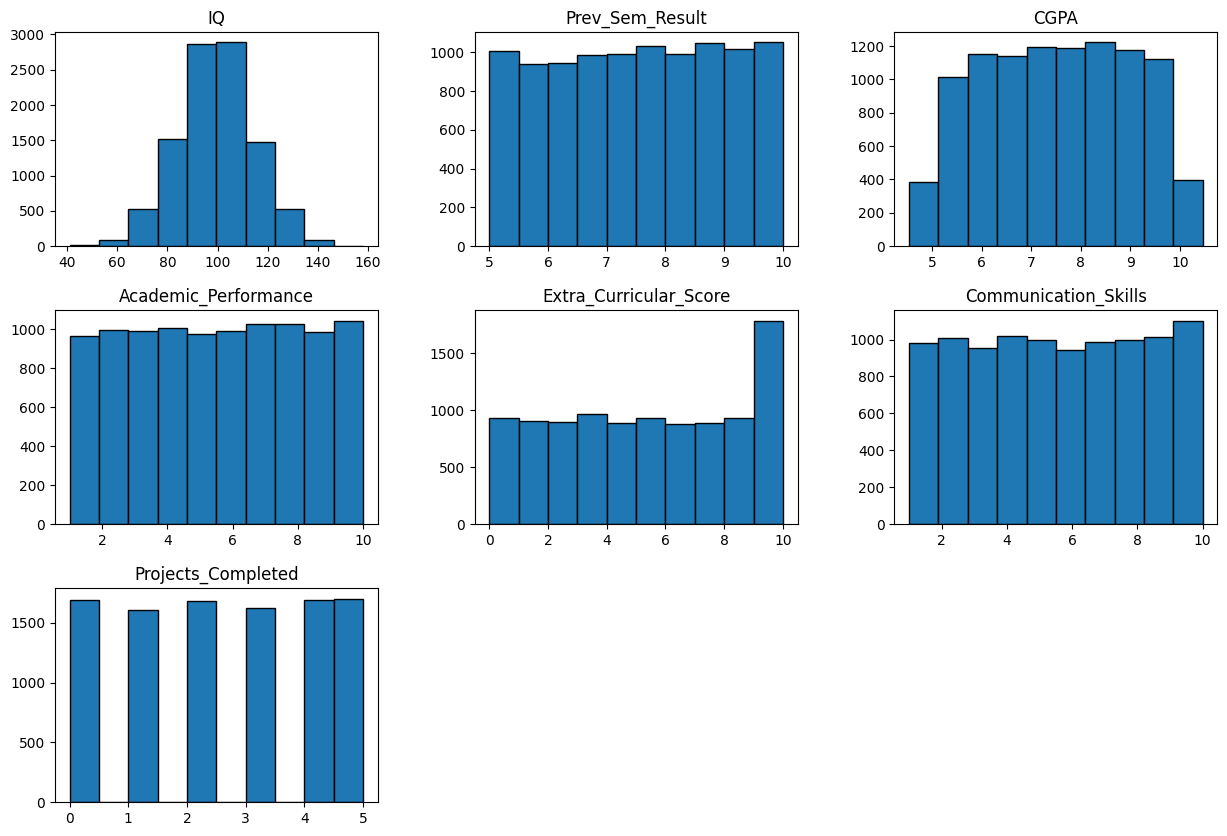

In [219]:
# Histograms show the distribution of numerical features
df[num_col].hist(figsize=(15,10),grid=False,edgecolor='black')
plt.show()

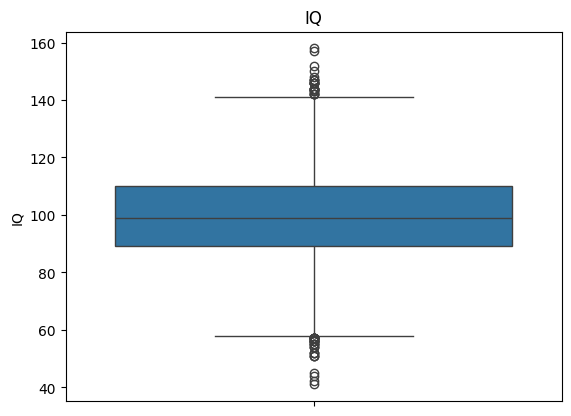

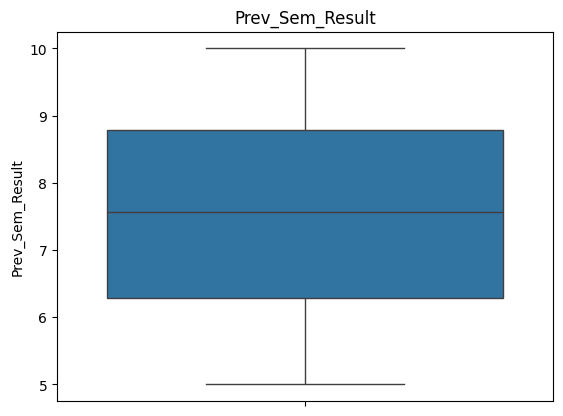

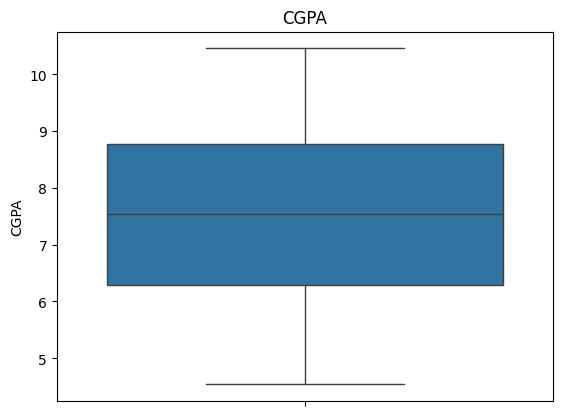

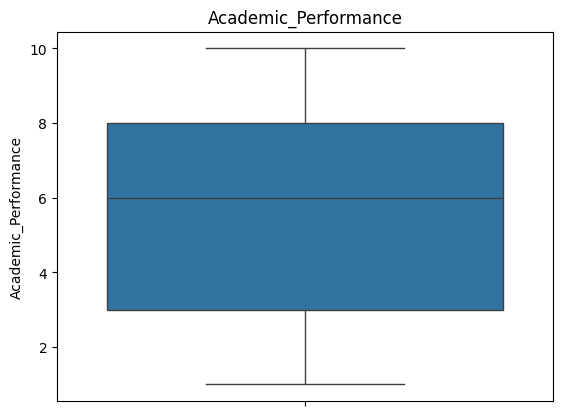

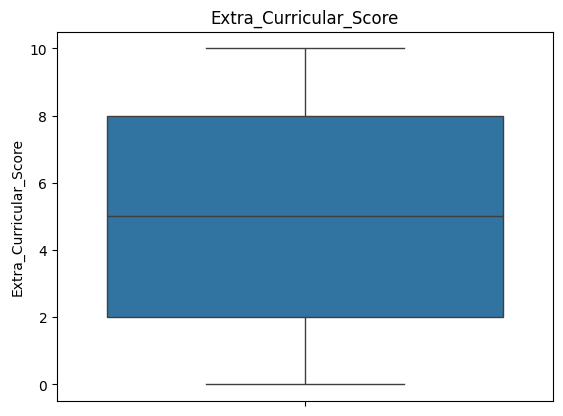

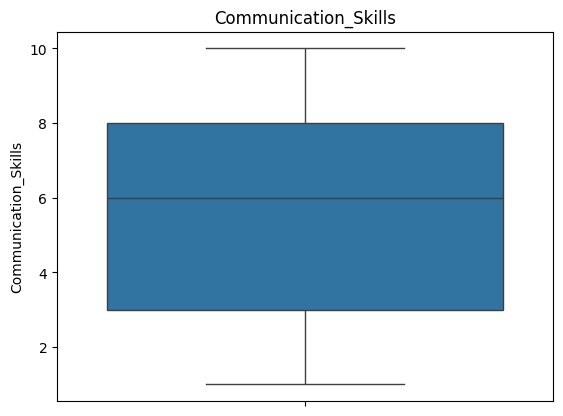

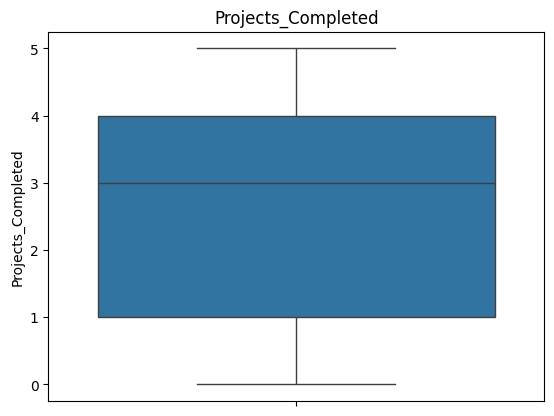

In [220]:
for i in num_col:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

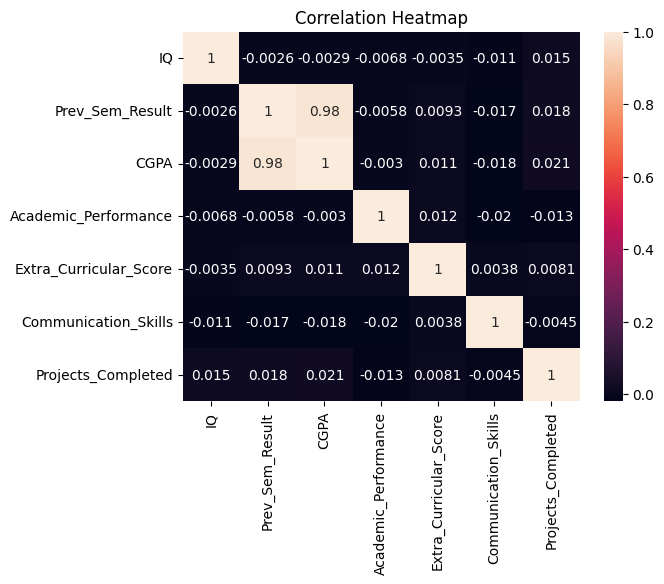

In [221]:

sns.heatmap(df[num_col].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

There is a correlation between  CGPA and Prev_Sem_Result 

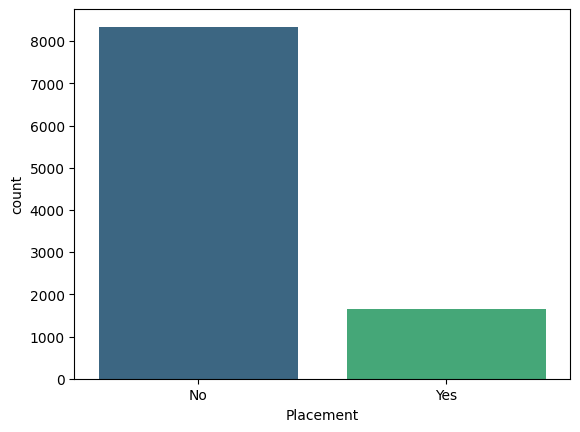

In [222]:

sns.countplot(data=df, x=df['Placement'],palette='viridis')
plt.show()

In [223]:
df['Placement'].value_counts()

Placement
No     8341
Yes    1659
Name: count, dtype: int64

the data is imbalanced

treatment the missing value & outliers

In [224]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight="balanced")


In [225]:
for i in num_col:
  Q1 = df[i].quantile(.25)
  Q3 = df[i].quantile(.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  df = df[(df[i] >= lower)&(df[i] <= upper)]
df.shape

(9939, 9)

In [226]:
for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower, upper=upper)  # Cap values outside range

print("Outliers have been capped using IQR method.")
df.shape


Outliers have been capped using IQR method.


(9939, 9)

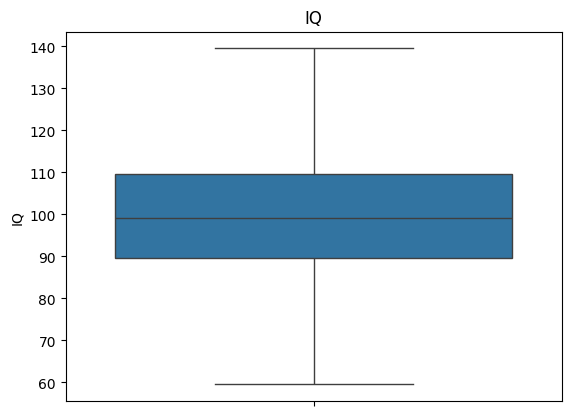

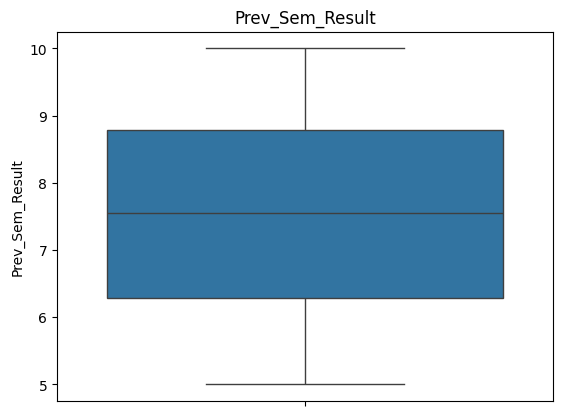

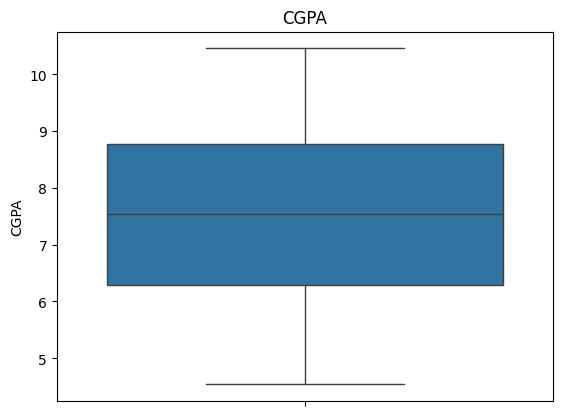

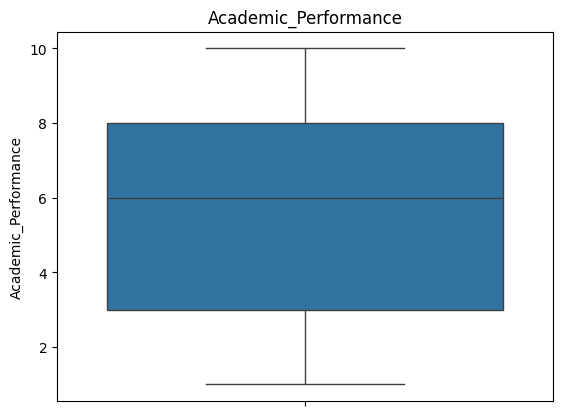

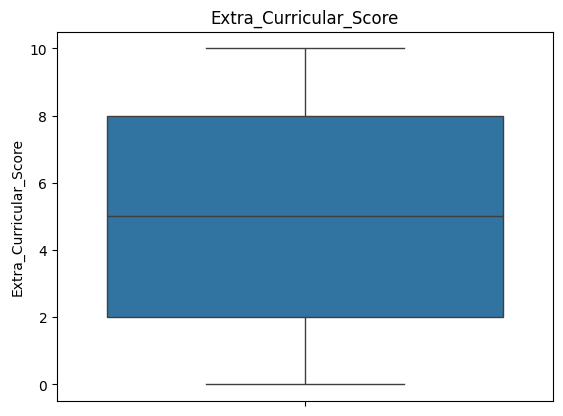

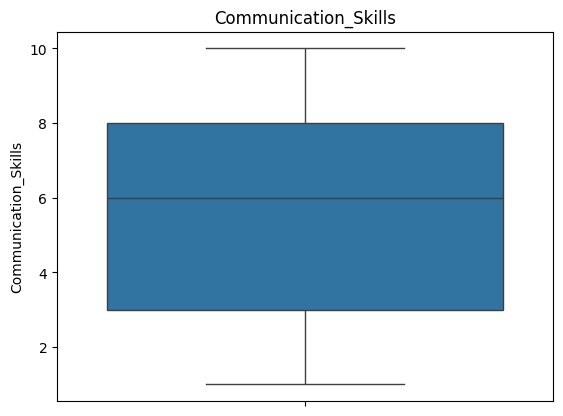

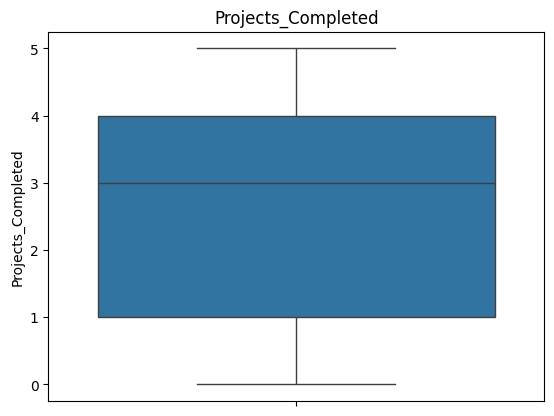

In [227]:
for i in num_col:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

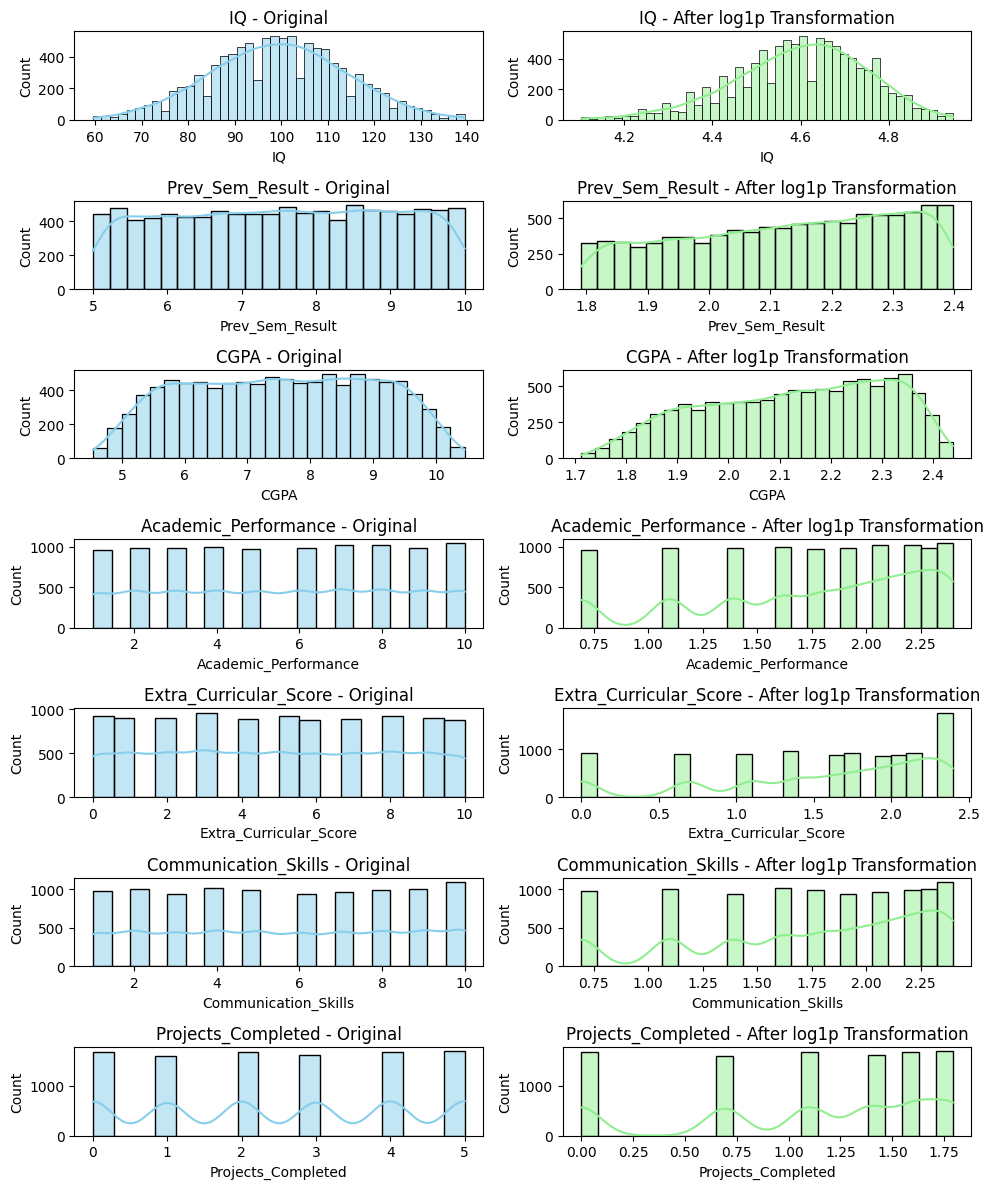

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(len(num_col), 2, figsize=(10, 12))

for i, col in enumerate(num_col):
    sns.histplot(df[col], kde=True, ax=axes[i,0], color="skyblue")
    axes[i,0].set_title(f"{col} - Original")

    sns.histplot(np.log1p(df[col]), kde=True, ax=axes[i,1], color="lightgreen")
    axes[i,1].set_title(f"{col} - After log1p Transformation")

plt.tight_layout()
plt.show()



Outliers were detected and capped using the IQR method to reduce their impact on model performance

Used square root transform since it improved data distribution well

 Analysis

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9939 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   IQ                      9939 non-null   float64
 1   Prev_Sem_Result         9939 non-null   float64
 2   CGPA                    9939 non-null   float64
 3   Academic_Performance    9939 non-null   int64  
 4   Internship_Experience   9939 non-null   object 
 5   Extra_Curricular_Score  9939 non-null   int64  
 6   Communication_Skills    9939 non-null   int64  
 7   Projects_Completed      9939 non-null   int64  
 8   Placement               9939 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 776.5+ KB


In [230]:
df.groupby('Placement')[num_col].mean()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
Placement,,,,,,,
No,97.624879,7.330233,7.321515,5.568467,4.978664,5.139224,2.347035
Yes,108.923920,8.564461,8.589562,5.452830,4.924528,7.660986,3.356056


In [231]:
cat_col = df.select_dtypes(include='object').columns    
cat_col

Index(['Internship_Experience', 'Placement'], dtype='object')

In [232]:
for col in cat_col:
    print(df.groupby(col)['Placement'].value_counts(normalize=True))

Internship_Experience  Placement
No                     No           0.833167
                       Yes          0.166833
Yes                    No           0.837014
                       Yes          0.162986
Name: proportion, dtype: float64
Placement
No     1.0
Yes    1.0
Name: proportion, dtype: float64


Encodeing

In [233]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])

Model

In [234]:
from sklearn.model_selection import train_test_split

x = df.drop("Placement", axis=1)  
y = df["Placement"]
x_train ,x_test , y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [235]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print ('train score:',model.score(x_train,y_train))
print ('Accuracy:',model.score(x_test,y_test))


train score: 1.0
Accuracy: 0.9994969818913481


In [236]:
import joblib
joblib.dump(model,"model.pkl")


['model.pkl']

In [237]:
df.shape

(9939, 9)